In [1]:
import sys, pandas as pd
sys.path.insert(0, "...") #directory of "fairgen" folder
from fairgen import FairGen

In [2]:
german = pd.read_json("german_train.json")

german

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age,Sex,Risk
372,2,2,0,3,2146,10,4,0,0,1
930,1,1,0,0,1747,24,4,0,1,1
902,2,0,4,3,10477,36,1,1,1,1
831,2,2,0,0,1216,18,1,0,0,0
106,3,1,0,3,6458,18,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
935,3,1,1,1,1919,30,5,1,1,0
978,1,1,0,3,2538,24,1,1,1,0
656,1,1,0,1,888,12,1,1,1,0
534,2,1,4,3,3105,24,5,0,1,1


In [3]:
sensitive_attributes = ['Sex', 'Age']
class_name = 'Risk'

causal_reg = [] #regressor
causal_class = [[['Job'], 'Housing']] #classifier
#multiple independent features are supported, e.g. [[['Job', 'Credit amount'], 'Housing']]

discrete_attributes = []
values_in_dataset_attributes = ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
#by default, FairGen considers every feature of the dataset as float
#for integer and categorical, use:
#discrete attributes => FairGen will assign values between the max and min 
#values_in_dataset_attributes => FairGen will assign values picking among those in the dataset

fitness = 'Distance' #alternatively: "Medoid"
ds = 'Fixed' #alternatively: 'Random'. For "values in dataset attributes"
#Random = values are picked randomly
#Fixed = values are picked w.r.t. their frequency. More frequent values

#Better results are generally obtained by using "Distance" as fitness measure
#and by placing most values in the "values_in_dataset_attributes" list, with "Fixed" as mode

In [4]:
fg = FairGen(german, sensitive_attributes, class_name, #<- must be included
                           causal_reg, causal_class, #<- causal relations
                           discrete_attributes, values_in_dataset_attributes, #<- how to handle the various features
                          'Distance', 'Fixed')

In [5]:
genetic_records = fg.get_syntethic()


To get syntethic data, run FairGen.fit() and FairGen.balance()


FairGen is running...

Target variable: Risk
Sensitive attributes: ['Sex', 'Age']

Discrete attributes: []
Attributes with only dataset values: ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']

Regressor: []
Classifier: [[['Job'], 'Housing']]
Ranking the data...


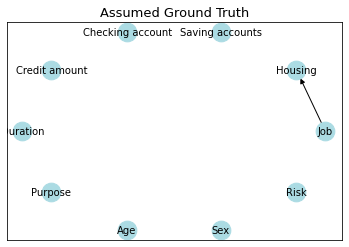

Creating the sensitive dictionary...

Analizing Sex ...

0.0 is discriminated: 0.09400214287276143
- DP: 156 · Expected: 172 · To be added: 16
- DN: 93 · Expected: 77 · To be removed: 16

1.0 is privileged: -0.09400214287276143
- PP: 397 · Expected: 381 · To be removed: 16
- PN: 154 · Expected: 170 · To be added: 16

Analizing Age ...

0.0 is discriminated: 0.19888402539532324
- DP: 84 · Expected: 109 · To be added: 25
- DN: 74 · Expected: 49 · To be removed: 25

1.0 is privileged: -0.19888402539532324
- PP: 469 · Expected: 444 · To be removed: 25
- PN: 173 · Expected: 198 · To be added: 25

Removing records...



In [6]:
fg.fit()


Removing records...

Records removed: 68

Current length of dataset:  732
GA started, 30 individual(s) will be generated
gen	nevals	min        	avg        
0  	150   	2.14014e-07	5.45559e-05
1  	77    	2.24277e-07	0.000103912
2  	82    	2.24277e-07	0.000112389
3  	89    	1.38885e-07	0.000117691
4  	97    	1.38885e-07	0.000142171
5  	84    	1.38885e-07	0.000150513
6  	87    	1.38885e-07	0.000151059
7  	88    	1.34053e-07	0.000157828
8  	92    	1.21613e-07	0.000183636
9  	90    	7.72973e-08	0.000193593
10 	86    	9.17914e-08	0.00021625 
11 	84    	2.23421e-08	0.000219192
12 	95    	2.23421e-08	0.000223825
13 	73    	2.07745e-07	0.000141084
14 	91    	7.37077e-08	0.000141199
15 	74    	2.22985e-07	0.000143165
16 	92    	1.864e-07  	0.00015954 
17 	76    	7.02138e-08	0.000196402
18 	80    	7.02138e-08	0.000199539
19 	93    	4.23074e-08	0.000200308
20 	85    	4.23074e-08	0.000198712
21 	75    	8.52563e-08	0.000227811
22 	86    	8.52563e-08	0.000227875
23 	84    	8.52563e-08	0.000227302
24 

<Figure size 432x288 with 0 Axes>

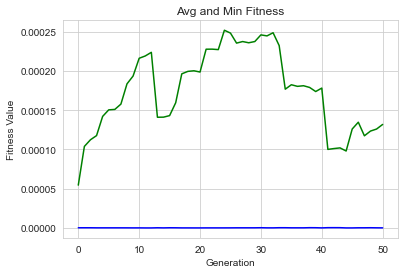

GA started, 11 individual(s) will be generated
gen	nevals	min       	avg        
0  	150   	1.2722e-07	2.90495e-05
1  	83    	9.26327e-08	4.1758e-05 
2  	96    	9.26327e-08	5.14705e-05
3  	106   	9.26327e-08	5.9315e-05 
4  	78    	9.26327e-08	6.13702e-05
5  	88    	9.26327e-08	7.35864e-05
6  	76    	2.31582e-07	7.70518e-05
7  	84    	2.31582e-07	8.56524e-05
8  	77    	2.31582e-07	8.60326e-05
9  	95    	2.31582e-07	8.93839e-05
10 	85    	2.31582e-07	8.70464e-05
11 	87    	2.31582e-07	8.93635e-05
12 	82    	2.31582e-07	8.97941e-05
13 	87    	1.38949e-07	8.10706e-05
14 	87    	1.85265e-07	8.04981e-05
15 	94    	3.67567e-07	8.07245e-05
16 	82    	6.30952e-07	8.09275e-05
17 	91    	1.59846e-07	7.99362e-05
18 	97    	2.34476e-07	7.8107e-05 
19 	82    	2.34476e-07	8.7877e-05 
20 	88    	2.34476e-07	8.15965e-05
21 	85    	2.34476e-07	7.98851e-05
22 	98    	6.77574e-07	8.00127e-05
23 	81    	6.876e-07  	8.04494e-05
24 	86    	2.87396e-07	8.15439e-05
25 	79    	2.87396e-07	7.97895e-05
26 	85    

<Figure size 432x288 with 0 Axes>

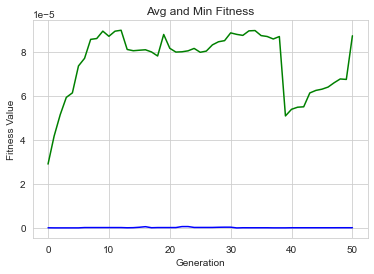

GA started, 10 individual(s) will be generated
gen	nevals	min        	avg        
0  	150   	3.22683e-07	0.000112592
1  	86    	3.99216e-07	0.0001112  
2  	93    	2.12871e-07	0.000130905
3  	101   	2.12871e-07	0.000135775
4  	92    	1.63738e-07	0.000150015
5  	93    	1.12401e-07	0.000148801
6  	80    	1.12401e-07	0.000152374
7  	86    	9.50366e-08	0.000157473
8  	77    	1.34184e-07	0.000163361
9  	90    	1.77228e-07	0.000165253
10 	85    	1.34872e-07	0.000158769
11 	83    	1.20993e-07	0.000111344
12 	85    	1.20993e-07	0.000110874
13 	84    	1.12323e-07	0.000112404
14 	76    	1.34514e-07	0.000114379
15 	79    	1.34514e-07	0.000120023
16 	79    	1.34514e-07	0.000121593
17 	95    	1.34514e-07	0.000122621
18 	74    	1.35651e-07	0.000121095
19 	97    	7.20292e-08	0.00012262 
20 	88    	8.4634e-08 	0.000130796
21 	87    	8.4634e-08 	0.000134249
22 	90    	7.67523e-08	0.00013875 
23 	83    	7.67523e-08	0.000136553
24 	101   	8.14641e-08	0.000110102
25 	97    	6.5674e-08 	8.39921e-05
26 	86  

<Figure size 432x288 with 0 Axes>

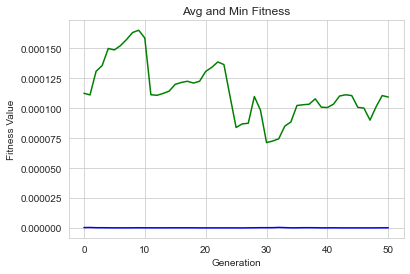

GA started, 17 individual(s) will be generated
gen	nevals	min        	avg        
0  	150   	1.56764e-07	3.32492e-05
1  	82    	1.0256e-07 	5.80579e-05
2  	96    	4.15631e-07	5.96302e-05
3  	85    	4.88044e-07	6.13803e-05
4  	89    	2.69937e-07	6.29223e-05
5  	85    	2.69937e-07	6.06633e-05
6  	87    	2.69937e-07	6.23282e-05
7  	82    	2.69937e-07	6.42689e-05
8  	77    	2.69937e-07	6.09418e-05
9  	81    	2.0201e-07 	6.24639e-05
10 	81    	2.0201e-07 	6.56836e-05
11 	103   	2.0201e-07 	6.81506e-05
12 	80    	2.12314e-07	9.95221e-05
13 	94    	3.22923e-07	9.99287e-05
14 	84    	2.47714e-07	9.26946e-05
15 	94    	2.47714e-07	9.82214e-05
16 	106   	3.71815e-07	9.88439e-05
17 	81    	3.71815e-07	9.91167e-05
18 	81    	1.37377e-07	9.86903e-05
19 	94    	2.23633e-07	9.60265e-05
20 	87    	2.23633e-07	9.65531e-05
21 	86    	2.23633e-07	9.79004e-05
22 	76    	2.23633e-07	0.000105245
23 	67    	2.90241e-07	0.000100486
24 	91    	3.30356e-07	9.98555e-05
25 	87    	7.37802e-08	0.000100315
26 	79  

<Figure size 432x288 with 0 Axes>

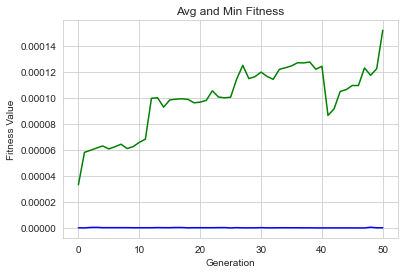

=== NEW DATASET ===

Analizing Sex ...

0.0 is discriminated: 0.0007070022376256535
- DP: 172 · Expected: 172 · To be added: 0
- DN: 77 · Expected: 77 · To be removed: 0

1.0 is privileged: -0.0007070022376256535
- PP: 381 · Expected: 381 · To be removed: 0
- PN: 170 · Expected: 170 · To be added: 0

Analizing Age ...

0.0 is discriminated: 0.0017153673252099377
- DP: 109 · Expected: 109 · To be added: 0
- DN: 49 · Expected: 49 · To be removed: 0

1.0 is privileged: -0.0017153673252099377
- PP: 444 · Expected: 444 · To be removed: 0
- PN: 198 · Expected: 198 · To be added: 0

OG dataset length: 800
Records generated: 68
New dataset length: 800
Time: 5.143282890319824


In [7]:
fg.balance()

In [8]:
new_df = fg.get_final_df()
new_df

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age,Sex,Risk
0,3.0,1.0,0.0,0.0,3345.0,24.0,4.0,1.0,1.0,0
1,2.0,1.0,0.0,0.0,2121.0,15.0,3.0,1.0,1.0,0
2,2.0,1.0,0.0,0.0,2993.0,21.0,4.0,1.0,1.0,0
3,2.0,1.0,1.0,0.0,2993.0,21.0,4.0,1.0,1.0,0
4,3.0,1.0,0.0,0.0,2659.0,18.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
63,2.0,1.0,0.0,1.0,2134.0,20.0,1.0,0.0,0.0,1
64,2.0,1.0,0.0,3.0,2671.0,24.0,1.0,0.0,0.0,1
65,3.0,1.0,0.0,1.0,2483.0,24.0,1.0,0.0,0.0,1
66,3.0,1.0,0.0,1.0,2116.0,18.0,1.0,0.0,0.0,1


In [9]:
genetic_records = fg.get_syntethic()
genetic_records

,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Age,Sex,Risk
0,3.0,1.0,0.0,0.0,3345.0,24.0,4.0,1.0,1.0,0
1,2.0,1.0,0.0,0.0,2121.0,15.0,3.0,1.0,1.0,0
2,2.0,1.0,0.0,0.0,2993.0,21.0,4.0,1.0,1.0,0
3,2.0,1.0,1.0,0.0,2993.0,21.0,4.0,1.0,1.0,0
4,3.0,1.0,0.0,0.0,2659.0,18.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
63,2.0,1.0,0.0,1.0,2134.0,20.0,1.0,0.0,0.0,1
64,2.0,1.0,0.0,3.0,2671.0,24.0,1.0,0.0,0.0,1
65,3.0,1.0,0.0,1.0,2483.0,24.0,1.0,0.0,0.0,1
66,3.0,1.0,0.0,1.0,2116.0,18.0,1.0,0.0,0.0,1
